In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# CSV 파일 로드
data = pd.read_csv('LR_M.csv')  # '데이터.csv'는 파일 경로에 맞게 수정해야 합니다.

In [3]:
# 독립 변수(X)와 종속 변수(y) 선택
X = data[['Month']].values  # 수정한 열 이름을 사용하여 선택
y = data['Demand'].values

In [4]:
# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

회귀 계수 (기울기): [0.02334601]
절편: -5129.615763956317
평균 제곱 오차 (MSE): 819.9198323634558
결정 계수 (R^2): 0.18147369176461436


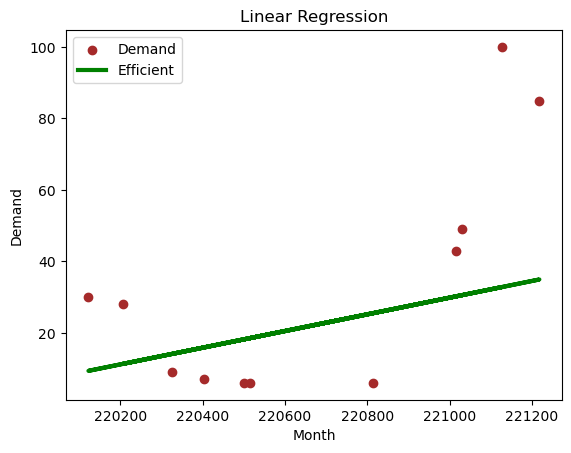

In [5]:
# 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 결과 출력
print("회귀 계수 (기울기):", model.coef_)
print("절편:", model.intercept_)
print("평균 제곱 오차 (MSE):", mse)
print("결정 계수 (R^2):", r2)

# 결과 시각화
plt.scatter(X_test, y_test, color='brown', label='Demand')
plt.plot(X_test, y_pred, color='green', linewidth=3, label='Efficient')
plt.xlabel('Month')
plt.ylabel('Demand')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [6]:
# 결과 표로 출력
result_df = pd.DataFrame({
    'Demand': y_test,
    'Efficient': y_pred,
    'Errors': y_test - y_pred
})

print("회귀 계수 (기울기):", model.coef_)
print("절편:", model.intercept_)
print("평균 제곱 오차 (MSE):", mse)
print("결정 계수 (R^2):", r2)

# 결과 표 출력
print(result_df)

회귀 계수 (기울기): [0.02334601]
절편: -5129.615763956317
평균 제곱 오차 (MSE): 819.9198323634558
결정 계수 (R^2): 0.18147369176461436
    Demand  Efficient     Errors
0        6  18.528657 -12.528657
1       43  30.225005  12.774995
2      100  32.816412  67.183588
3        9  14.139607  -5.139607
4       49  30.551849  18.448151
5       28  11.314741  16.685259
6        6  18.201812 -12.201812
7       85  34.940898  50.059102
8       30   9.377022  20.622978
9        6  25.509112 -19.509112
10       7  15.913904  -8.913904


In [7]:
print(data)

     Month  Demand
0   220102      50
1   220109      45
2   220116      40
3   220123      30
4   220130      33
5   220206      28
6   220213      22
7   220220      23
8   220227      19
9   220306      16
10  220313      11
11  220320      12
12  220327       9
13  220403       7
14  220410       7
15  220417       5
16  220424       6
17  220501       6
18  220508       5
19  220515       6
20  220522       5
21  220529       4
22  220605       6
23  220612       5
24  220619       5
25  220626       5
26  220703       5
27  220710       4
28  220717       5
29  220724       5
30  220731       6
31  220807       6
32  220814       6
33  220821       8
34  220828       8
35  220904       9
36  220911      11
37  220918      11
38  220925      12
39  221002      17
40  221009      35
41  221016      43
42  221023      43
43  221030      49
44  221106      54
45  221113      55
46  221120      49
47  221127     100
48  221204      82
49  221211      81
50  221218      85
51  221225  

In [8]:
pip install pandas statsmodels matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
data = pd.read_csv('LR_M.csv')

In [3]:
# 시계열 데이터 추출
time_series = data['Demand']  # 시계열 데이터 열을 선택 (실제 열 이름으로 변경)

In [4]:
# Simple Exponential Smoothing 모델 생성 및 훈련
model = sm.tsa.SimpleExpSmoothing(time_series).fit()

In [5]:
# 결과를 표로 출력
result_df = pd.DataFrame({
    'Demand': time_series[-5:],  # 마지막 5개 데이터 포인트
    'Efficient': forecast
})
print(result_df)

# 결과 시각화
plt.plot(time_series, color='green', label='Demand')
plt.plot(time_series.index[-1] + np.arange(1, 6), forecast, color='brown', label='Efficient', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Demand')
plt.title('Simple Exponential Smoothing')
plt.legend()
plt.show()

NameError: name 'forecast' is not defined

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# CSV 파일 로드
data = pd.read_csv('LR_M.csv')

    Demand  Efficient
47   100.0        NaN
48    82.0        NaN
49    81.0        NaN
50    85.0        NaN
51    68.0        NaN
52     NaN  72.188078
53     NaN  71.119065
54     NaN  71.391932
55     NaN  71.322282
56     NaN  71.340060


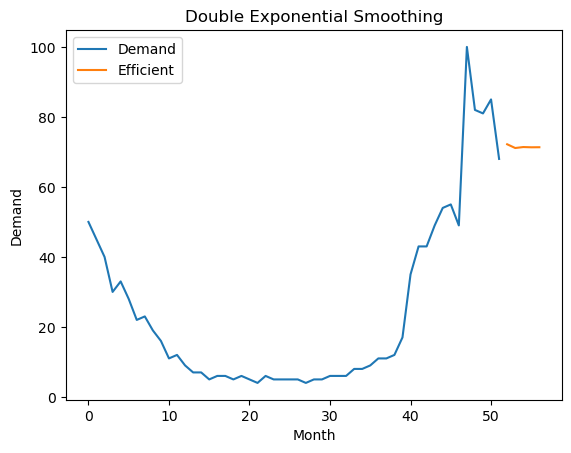

In [8]:
# 시계열 데이터 추출
time_series = data['Demand']  # 시계열 데이터 열을 선택 (실제 열 이름으로 변경)

# ARIMA 모델 생성 및 훈련
model = ARIMA(time_series, order=(1, 1, 1))  # ARIMA(p, d, q)의 파라미터 설정 (p, d, q는 각각 AR, 차분, MA의 차수)
model_fit = model.fit()

# 예측 수행
forecast = model_fit.predict(start=len(time_series), end=len(time_series) + 4, typ='levels')  # 다음 5개 데이터 포인트를 예측

# 결과를 표로 출력
result_df = pd.DataFrame({
    'Demand': time_series[-5:],  # 마지막 5개 데이터 포인트
    'Efficient': forecast
})
print(result_df)

# 결과 시각화
plt.plot(time_series, label='Demand')
plt.plot(np.arange(len(time_series), len(time_series) + 5), forecast, label='Efficient', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Demand')
plt.title('Double Exponential Smoothing')
plt.legend()
plt.show()

    Demand  Efficient
47   100.0        NaN
48    82.0        NaN
49    81.0        NaN
50    85.0        NaN
51    68.0        NaN
52     NaN  77.960679
53     NaN  81.098631
54     NaN  84.362887
55     NaN  87.758531
56     NaN  91.290851


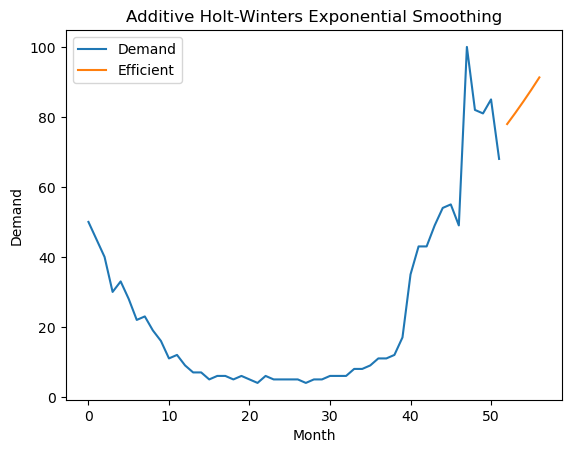

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import Holt

# CSV 파일 로드
data = pd.read_csv('LR_M.csv')  # '데이터.csv'는 파일 경로에 맞게 수정해야 합니다.

# 시계열 데이터 추출
time_series = data['Demand']  # 시계열 데이터 열을 선택 (실제 열 이름으로 변경)

# Holt-Winters Exponential Smoothing 모델 생성 및 훈련
model = Holt(time_series, exponential=True)
model_fit = model.fit()

# 예측 수행
forecast = model_fit.forecast(steps=5)  # 다음 5개 데이터 포인트를 예측

# 결과를 표로 출력
result_df = pd.DataFrame({
    'Demand': time_series[-5:],  # 마지막 5개 데이터 포인트
    'Efficient': forecast
})
print(result_df)

# 결과 시각화
plt.plot(time_series, label='Demand')
plt.plot(time_series.index[-1] + np.arange(1, 6), forecast, label='Efficient', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Demand')
plt.title('Additive Holt-Winters Exponential Smoothing')
plt.legend()
plt.show()

    Demand  Efficient
47   100.0        NaN
48    82.0        NaN
49    81.0        NaN
50    85.0        NaN
51    68.0        NaN
52     NaN  84.055948
53     NaN  84.392180
54     NaN  84.664764
55     NaN  84.885595
56     NaN  85.064399


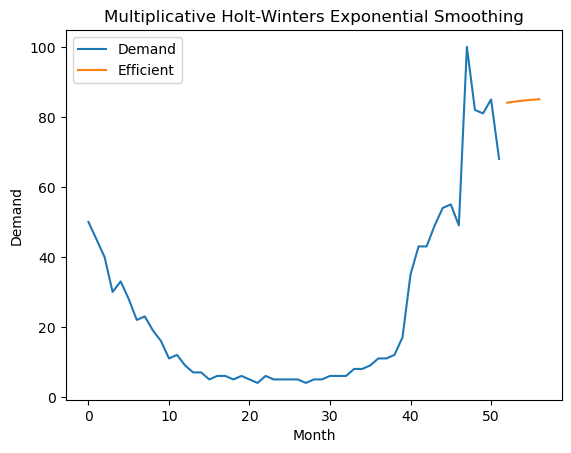

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import Holt

# CSV 파일 로드
data = pd.read_csv('LR_M.csv')  # '데이터.csv'는 파일 경로에 맞게 수정해야 합니다.

# 시계열 데이터 추출
time_series = data['Demand']  # 시계열 데이터 열을 선택 (실제 열 이름으로 변경)

# Holt-Winters Exponential Smoothing 모델 생성 및 훈련
model = Holt(time_series, exponential=True, damped_trend=True)
model_fit = model.fit()

# 예측 수행
forecast = model_fit.forecast(steps=5)  # 다음 5개 데이터 포인트를 예측

# 결과를 표로 출력
result_df = pd.DataFrame({
    'Demand': time_series[-5:],  # 마지막 5개 데이터 포인트
    'Efficient': forecast
})
print(result_df)

# 결과 시각화
plt.plot(time_series, label='Demand')
plt.plot(time_series.index[-1] + np.arange(1, 6), forecast, label='Efficient', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Demand')
plt.title('Multiplicative Holt-Winters Exponential Smoothing')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

y_true = [100.0, 82.0, 81.0, 85.0, 68.0 ]

y_pred = [77.961, 81.099, 84.363, 87.759, 91.291]

# MSE 계산
mse = mean_squared_error(y_true, y_pred)
print("평균 제곱 오차 (MSE):", mse)

# R-squared 계산
r2 = r2_score(y_true, y_pred)
print("결정 계수 (R^2):", r2)

평균 제곱 오차 (MSE): 209.5843706
결정 계수 (R^2): -1.0044411878347361


In [22]:
import numpy as np

y_true =  [100.0, 82.0, 81.0, 85.0, 68.0 ]

y_pred = [77.961, 81.099, 84.363, 87.759, 91.291]

# MAPE 계산
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_true, y_pred)
print("MAPE:", mape)

MAPE: 12.957397056166636
